In [1]:
#pip install ipympl


### Basics of vector mathematics and linear algebra

Line (Vector) AB: (5, 5, 5)
Distance between Point A and Point B: 8.660254037844387
Length of Line (Vector) AB: 8.660254037844387


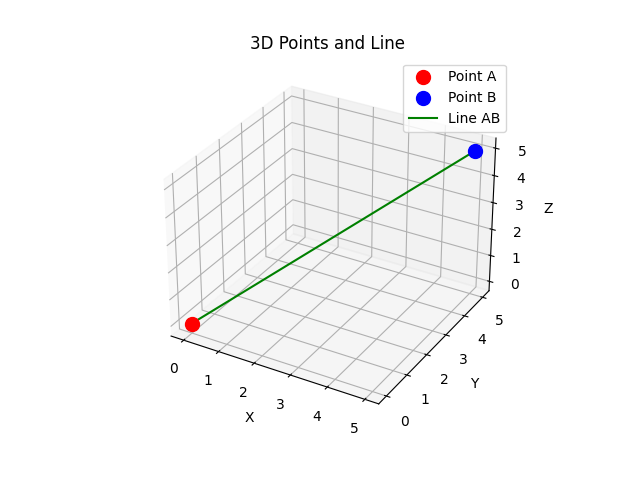

In [2]:
%matplotlib widget
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def define_point(x, y, z):
    """
    Define a point in 3D space.
    
    Args:
    x (float): The x-coordinate of the point.
    y (float): The y-coordinate of the point.
    z (float): The z-coordinate of the point.
    
    Returns:
    tuple: A tuple representing the point (x, y, z).
    """
    return (x, y, z)

def create_line(point1, point2):
    """
    Create a line (vector) between two points in 3D space.
    
    Args:
    point1 (tuple): The first point (x1, y1, z1).
    point2 (tuple): The second point (x2, y2, z2).
    
    Returns:
    tuple: A tuple representing the line (vector) from point1 to point2.
    """
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    return (x2 - x1, y2 - y1, z2 - z1)

def calculate_distance(point1, point2):
    """
    Calculate the distance between two points in 3D space.
    
    Args:
    point1 (tuple): The first point (x1, y1, z1).
    point2 (tuple): The second point (x2, y2, z2).
    
    Returns:
    float: The distance between the two points.
    """
    x1, y1, z1 = point1
    x2, y2, z2 = point2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

def calculate_line_length(line):
    """
    Calculate the length of a line (vector) in 3D space.
    
    Args:
    line (tuple): The line (vector) represented by its components (dx, dy, dz).
    
    Returns:
    float: The length of the line.
    """
    dx, dy, dz = line
    return math.sqrt(dx**2 + dy**2 + dz**2)

def plot_3d_points_and_line(point1, point2):
    """
    Plot two points and the line connecting them in 3D space.
    
    Args:
    point1 (tuple): The first point (x1, y1, z1).
    point2 (tuple): The second point (x2, y2, z2).
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot points
    ax.scatter(*point1, color='r', s=100, label='Point A')
    ax.scatter(*point2, color='b', s=100, label='Point B')
    
    # Plot line
    line_x = [point1[0], point2[0]]
    line_y = [point1[1], point2[1]]
    line_z = [point1[2], point2[2]]
    ax.plot(line_x, line_y, line_z, color='g', label='Line AB')
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Points and Line')
    ax.legend()
    
    plt.show()

# Example usage:
# Define two points
pointA = define_point(0, 0, 0)
pointB = define_point(5, 5, 5)

# Create a line (vector) between the two points
lineAB = create_line(pointA, pointB)
print("Line (Vector) AB:", lineAB)

# Calculate the distance between the two points
distanceAB = calculate_distance(pointA, pointB)
print("Distance between Point A and Point B:", distanceAB)

# Calculate the length of the line (vector) AB
line_lengthAB = calculate_line_length(lineAB)
print("Length of Line (Vector) AB:", line_lengthAB)

# Plot the points and the line in 3D
plot_3d_points_and_line(pointA, pointB)

Line (Vector) AB: (0, 1, 0)
Line (Vector) CD: (1, 0, 0)
Normal Vector of the Plane: (0, 0, -1)


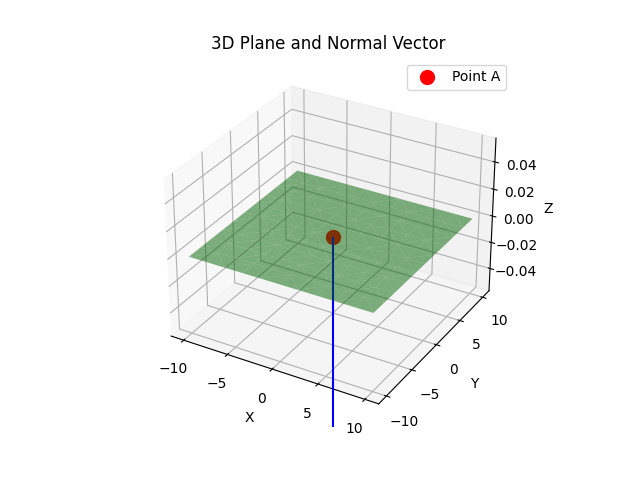

In [3]:
def create_plane(line1, line2):
    """
    Create a plane from two non-parallel lines (vectors) in 3D space.
    
    Args:
    line1 (tuple): The first line (vector) represented by its components (dx1, dy1, dz1).
    line2 (tuple): The second line (vector) represented by its components (dx2, dy2, dz2).
    
    Returns:
    tuple: A tuple representing the normal vector of the plane.
    """
    dx1, dy1, dz1 = line1
    dx2, dy2, dz2 = line2
    
    # Cross product to find the normal vector
    nx = dy1 * dz2 - dz1 * dy2
    ny = dz1 * dx2 - dx1 * dz2
    nz = dx1 * dy2 - dy1 * dx2
    
    return (nx, ny, nz)

def plot_plane_and_normal(point, normal, line1, line2):
    """
    Plot a plane and its normal vector in 3D space.
    
    Args:
    point (tuple): A point on the plane (x, y, z).
    normal (tuple): The normal vector of the plane (nx, ny, nz).
    line1 (tuple): The first line (vector) on the plane.
    line2 (tuple): The second line (vector) on the plane.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot points
    ax.scatter(*point, color='r', s=100, label='Point A')

    # Calculate plane points
    x0, y0, z0 = point
    dx1, dy1, dz1 = line1
    dx2, dy2, dz2 = line2

    # Generate plane grid
    plane_points = []
    for t1 in range(-10, 11, 2):
        for t2 in range(-10, 11, 2):
            x = x0 + t1 * dx1 + t2 * dx2
            y = y0 + t1 * dy1 + t2 * dy2
            z = z0 + t1 * dz1 + t2 * dz2
            plane_points.append((x, y, z))

    plane_points = list(zip(*plane_points))
    ax.plot_trisurf(plane_points[0], plane_points[1], plane_points[2], alpha=0.5, color='g')

    # Plot the normal vector
    nx, ny, nz = normal
    ax.quiver(x0, y0, z0, nx, ny, nz, color='b', length=5)

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Plane and Normal Vector')
    ax.legend()

    plt.show()

# Example usage:
# Define two points for the first line
pointA = define_point(0, 0, 0)
pointB = define_point(0, 1, 0)

# Define another two points for the second line
pointC = define_point(0, 0, 0)
pointD = define_point(1, 0, 0)

# Create two lines (vectors) between the points
lineAB = create_line(pointA, pointB)
lineCD = create_line(pointC, pointD)
print("Line (Vector) AB:", lineAB)
print("Line (Vector) CD:", lineCD)

# Calculate the normal vector of the plane formed by the two lines
normalVector = create_plane(lineAB, lineCD)
print("Normal Vector of the Plane:", normalVector)

# Plot the plane and the normal vector in 3D
plot_plane_and_normal(pointA, normalVector, lineAB, lineCD)


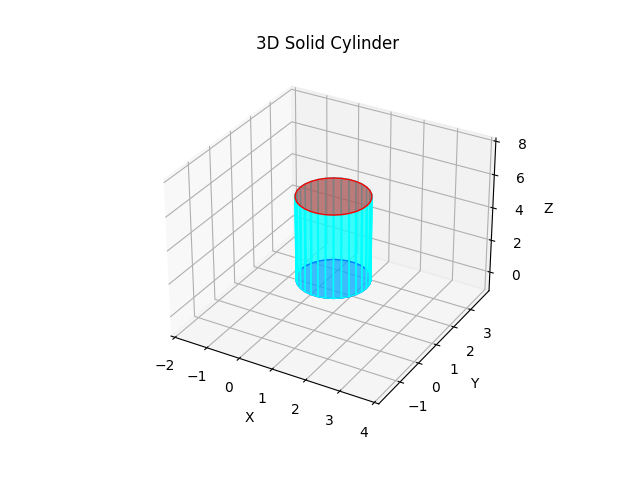

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math


def create_cylinder(point, direction, radius, height, resolution=30):
    """
    Create a solid cylinder at a given point and direction.
    
    Args:
    point (tuple): The starting point of the cylinder (x, y, z).
    direction (tuple): The direction vector of the cylinder (dx, dy, dz).
    radius (float): The radius of the cylinder.
    height (float): The height of the cylinder.
    resolution (int): The number of segments to approximate the cylinder.
    
    Returns:
    list: Vertices of the cylinder for plotting.
    """
    x0, y0, z0 = point
    dx, dy, dz = direction

    # Normalize direction vector
    mag = math.sqrt(dx**2 + dy**2 + dz**2)
    dx, dy, dz = dx / mag, dy / mag, dz / mag

    # Compute orthogonal vectors to the direction
    if dx == 0 and dy == 0:  # Handle the special case where direction is along z-axis
        ux, uy, uz = 1, 0, 0
        vx, vy, vz = 0, 1, 0
    else:
        ux, uy, uz = -dy, dx, 0  # Perpendicular to the direction in XY plane
        umag = math.sqrt(ux**2 + uy**2 + uz**2)
        ux, uy, uz = ux / umag, uy / umag, uz / umag

        vx, vy, vz = -dz*dx, -dz*dy, dx**2 + dy**2  # Perpendicular to both direction and ux, uy, uz
        vmag = math.sqrt(vx**2 + vy**2 + vz**2)
        vx, vy, vz = vx / vmag, vy / vmag, vz / vmag

    # Compute circle points in the orthogonal plane
    angle_step = 2 * math.pi / resolution
    circle_points = []
    for i in range(resolution):
        angle = i * angle_step
        cx = x0 + radius * (ux * math.cos(angle) + vx * math.sin(angle))
        cy = y0 + radius * (uy * math.cos(angle) + vy * math.sin(angle))
        cz = z0 + radius * (uz * math.cos(angle) + vz * math.sin(angle))
        circle_points.append((cx, cy, cz))

    # Create cylinder vertices
    vertices = []
    for cx, cy, cz in circle_points:
        vertices.append((cx, cy, cz))
        vertices.append((cx + height * dx, cy + height * dy, cz + height * dz))

    return vertices

def plot_cylinder(vertices, resolution=30):
    """
    Plot a solid cylinder in 3D space.
    
    Args:
    vertices (list): Vertices of the cylinder.
    resolution (int): The number of segments to approximate the cylinder.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot cylinder surface
    for i in range(0, len(vertices), 2):
        j = (i + 2) % len(vertices)
        verts = [
            [vertices[i], vertices[j], vertices[j + 1], vertices[i + 1]]
        ]
        ax.add_collection3d(Poly3DCollection(verts, color='cyan', alpha=0.5))

    # Plot cylinder base and top
    base = [vertices[i] for i in range(0, len(vertices), 2)]
    top = [vertices[i+1] for i in range(0, len(vertices), 2)]
    ax.add_collection3d(Poly3DCollection([base], color='blue', alpha=0.5))
    ax.add_collection3d(Poly3DCollection([top], color='red', alpha=0.5))

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Solid Cylinder')

        # Set the range of the axes for better visualization
    all_points = base + top
    x_vals = [point[0] for point in all_points]
    y_vals = [point[1] for point in all_points]
    z_vals = [point[2] for point in all_points]

    ax.set_xlim([min(x_vals) - 2, max(x_vals) + 2])
    ax.set_ylim([min(y_vals) - 2, max(y_vals) + 2])
    ax.set_zlim([min(z_vals) - 2, max(z_vals) + 2])

    plt.show()

# Example usage:
# Define the starting point and direction
start_point = define_point(1, 1, 1)
direction_vector = (0, 0, 1)  # Cylinder aligned along the z-axis

# Create the cylinder vertices
cylinder_vertices = create_cylinder(start_point, direction_vector, radius=1, height=5)

# Plot the cylinder
plot_cylinder(cylinder_vertices)
